## Manual Time Series Implementation
Check for weekly and monthly not just hourly and daily

In [127]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
#load dataset from cleaning notebook
df = pd.read_csv("household_power_cleaned.csv.zip", parse_dates=["Datetime"], index_col="Datetime")

#target variable
power_df = df["Global_active_power"].copy()
power_df.head()

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [130]:
#option1: hourly average power
hourly = power_df.resample("H").mean()
#option2: daily average power
daily = power_df.resample("D").mean()

print("Original length:", len(power_df))
print("Hourly length:", len(hourly))
print("Daily length:", len(daily))

#choose metric to model
tsh = hourly.dropna()
tsd = daily.dropna()
print(tsh.head())
print(tsd.head())

Original length: 2049280
Hourly length: 34589
Daily length: 1442
Datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Name: Global_active_power, dtype: float64
Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
Name: Global_active_power, dtype: float64


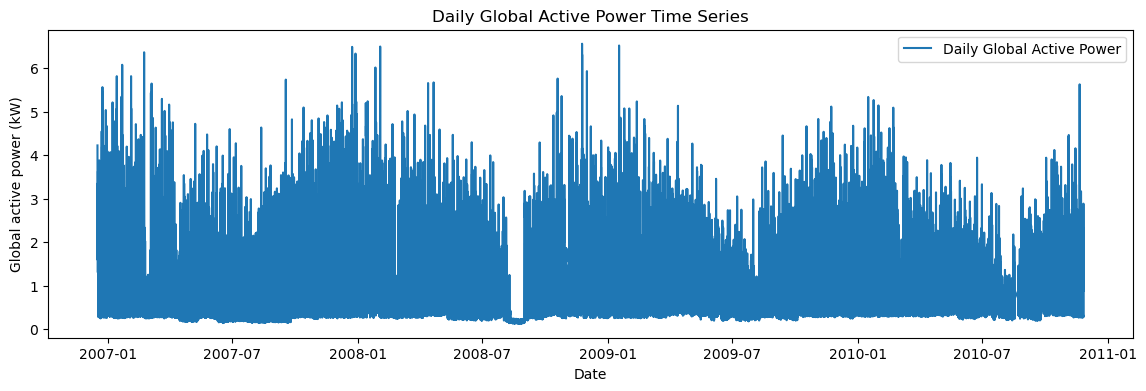

In [131]:
#initial hourly plot
plt.figure(figsize=(14, 4))
plt.plot(tsh, label="Daily Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Daily Global Active Power Time Series")
plt.legend()
plt.show()

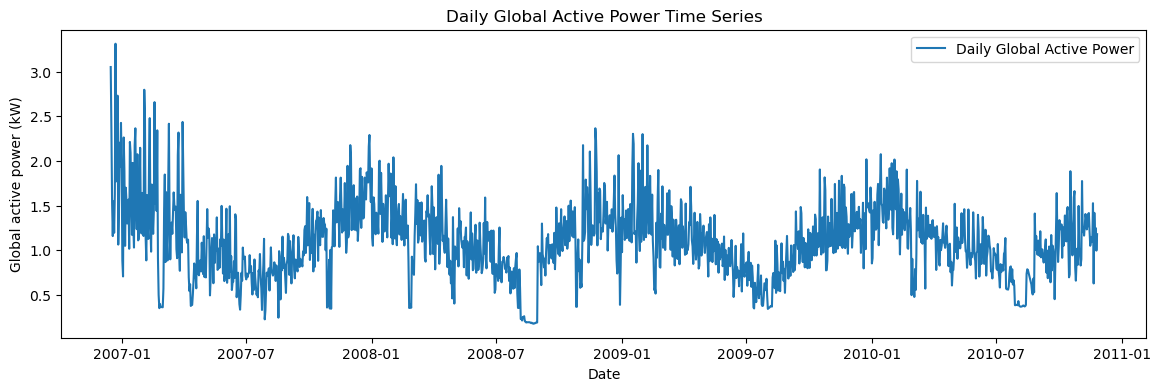

In [133]:
#initial daily plot
plt.figure(figsize=(14, 4))
plt.plot(tsd, label="Daily Global Active Power")
plt.xlabel("Date")
plt.ylabel("Global active power (kW)")
plt.title("Daily Global Active Power Time Series")
plt.legend()
plt.show()

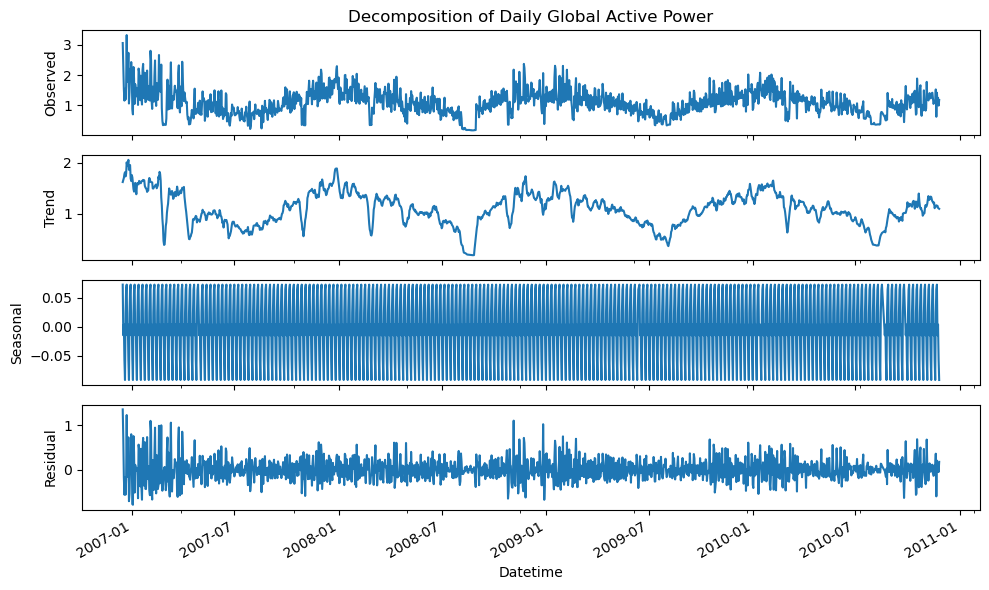

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose

#daily compostion
#7 period for weekly pattern
decomp_d = seasonal_decompose(tsd, period=7, model='additive', extrapolate_trend='freq')
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Daily Global Active Power')
decomp_d.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_d.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_d.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_d.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

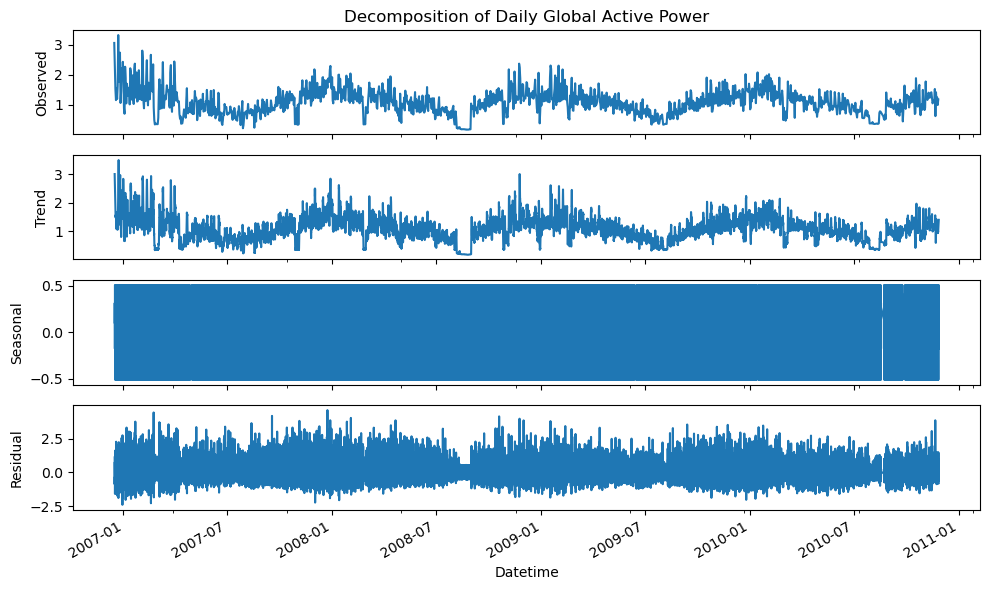

In [139]:
#daily compostion
#24 period for daily pattern
decomp_h = seasonal_decompose(tsh, period=24, model='additive', extrapolate_trend='freq')
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 6))

ax[0].set_title('Decomposition of Daily Global Active Power')
decomp_d.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp_h.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp_h.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp_h.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

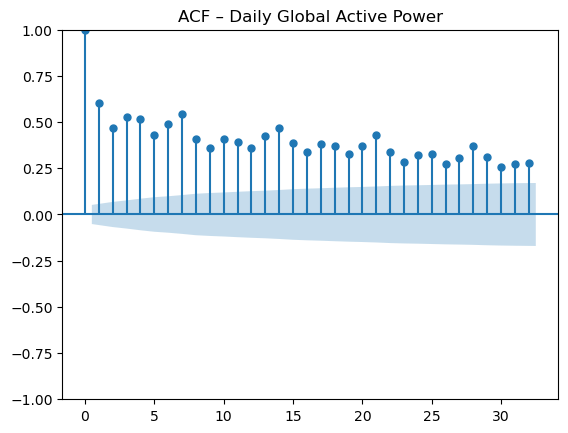

<Figure size 1000x400 with 0 Axes>

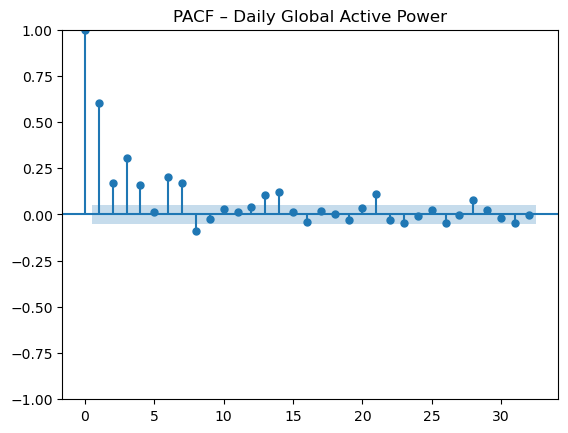

In [140]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#daily lag analysis
series_for_lags_d = tsd

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_d, title="ACF – Daily Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_d, title="PACF – Daily Global Active Power")
plt.show()

<Figure size 1000x400 with 0 Axes>

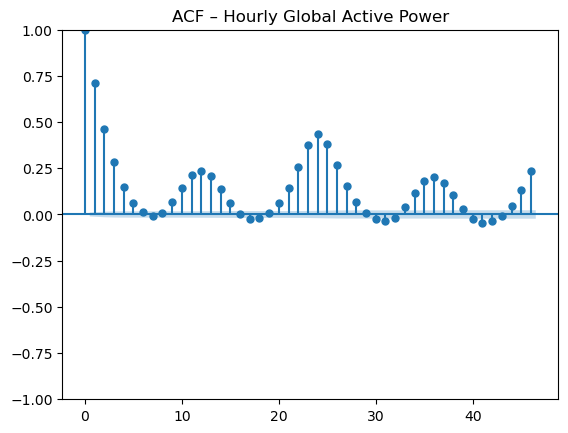

<Figure size 1000x400 with 0 Axes>

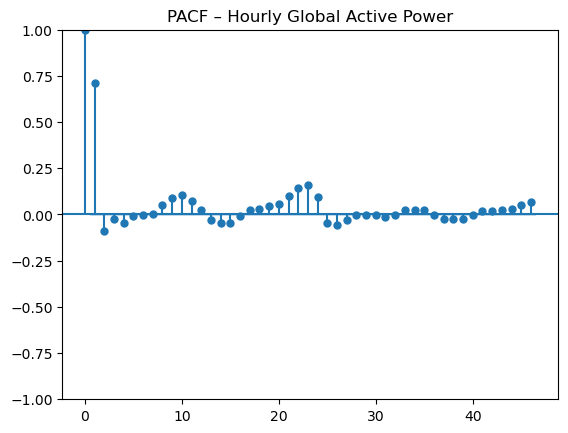

In [143]:
#hourly lag analysis
series_for_lags_h = tsh

plt.figure(figsize=(10, 4))
plot_acf(series_for_lags_h, title="ACF – Hourly Global Active Power")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(series_for_lags_h, title="PACF – Hourly Global Active Power")
plt.show()

In [144]:
#lag feature function
def create_lag_features(series, lags):
    df = series.to_frame().copy()
    for lag in lags:
        df[f"lag_{lag}"] = df["Global_active_power"].shift(lag)
    return df

#apply the function with chosen lags for hourly and daily
#24 and 48 for daily and every 2 days
lags_h = [1, 2, 3, 24, 48]
#7 for weekly
lags_d = [1, 2, 3, 4, 7]
df_lagged_h = create_lag_features(tsh, lags_h)
df_lagged_d = create_lag_features(tsd, lags_d)

#drop rows with missing lag values
df_lagged_h = df_lagged_h.dropna()
print(df_lagged_h.head())
df_lagged_d = df_lagged_d.dropna()
print(df_lagged_d.head())

                     Global_active_power     lag_1     lag_2     lag_3  \
Datetime                                                                 
2006-12-18 17:00:00             2.154900  1.949300  1.784300  1.733033   
2006-12-18 18:00:00             2.402533  2.154900  1.949300  1.784300   
2006-12-18 19:00:00             2.614500  2.402533  2.154900  1.949300   
2006-12-18 20:00:00             3.050567  2.614500  2.402533  2.154900   
2006-12-18 21:00:00             2.169733  3.050567  2.614500  2.402533   

                       lag_24    lag_48  
Datetime                                 
2006-12-18 17:00:00  3.406767  4.222889  
2006-12-18 18:00:00  3.697100  3.632200  
2006-12-18 19:00:00  2.908400  3.400233  
2006-12-18 20:00:00  3.361500  3.268567  
2006-12-18 21:00:00  3.040767  3.056467  
            Global_active_power     lag_1     lag_2     lag_3     lag_4  \
Datetime                                                                  
2006-12-23             3.314851  1.62

In [147]:
#chronological 80/20 train test split for hourly
train_size_h = int(len(df_lagged_h) * 0.8)
train_h = df_lagged_h.iloc[:train_size_h]
test_h = df_lagged_h.iloc[train_size_h:]

In [149]:
#chronological 80/20 train test split for daily
train_size_d = int(len(df_lagged_d) * 0.8)
train_d = df_lagged_d.iloc[:train_size_d]
test_d = df_lagged_d.iloc[train_size_d:]

In [151]:
#hourly train test
X_train_h = train_h.drop(columns=["Global_active_power"]).values
y_train_h = train_h["Global_active_power"].values

X_test_h = test_h.drop(columns=["Global_active_power"]).values
y_test_h = test_h["Global_active_power"].values

In [153]:
#daily train test
X_train_d = train_d.drop(columns=["Global_active_power"]).values
y_train_d = train_d["Global_active_power"].values

X_test_d = test_d.drop(columns=["Global_active_power"]).values
y_test_d = test_d["Global_active_power"].values

In [155]:
#manual AR model fitting, hourly and daily

#hourly AR(p)
XtX_h = X_train_h.T @ X_train_h
XtY_h = X_train_h.T @ y_train_h

#hourly coefficients
w_h = np.linalg.inv(XtX_h) @ XtY_h   

#hourly predictions
y_pred_train_h = X_train_h @ w_h
y_pred_test_h  = X_test_h  @ w_h

#daily AR(p) model
XtX_d = X_train_d.T @ X_train_d
XtY_d = X_train_d.T @ y_train_d

#daily coefficients
w_d = np.linalg.inv(XtX_d) @ XtY_d   

#daily predictions
y_pred_train_d = X_train_d @ w_d
y_pred_test_d  = X_test_d  @ w_d

print("Hourly coefficients:", w_h, '\n')
print("\nDaily coefficients:", w_d)

Hourly coefficients: [ 0.69425966 -0.07312469  0.02183379  0.17527765  0.14680547] 


Daily coefficients: [0.37103498 0.01485305 0.22665649 0.10880051 0.26686934]


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#mean absolute percentage error
def mape(y_true, y_pred):
    #avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

#hourly
mae_train_h = mean_absolute_error(y_train_h, y_pred_train_h)
rmse_train_h = np.sqrt(mean_squared_error(y_train_h, y_pred_train_h))
mape_train_h = mape(y_train_h, y_pred_train_h)
r2_train_h   = r2_score(y_train_h, y_pred_train_h)

mae_test_h = mean_absolute_error(y_test_h, y_pred_test_h)
rmse_test_h = np.sqrt(mean_squared_error(y_test_h, y_pred_test_h))
mape_test_h = mape(y_test_h, y_pred_test_h)
r2_test_h   = r2_score(y_test_h, y_pred_test_h)

print("hourly model")
print("Train - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_train_h, rmse_train_h, mape_train_h, r2_train_h))
print("Test - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_test_h, rmse_test_h, mape_test_h, r2_test_h))

#daily
mae_train_d = mean_absolute_error(y_train_d, y_pred_train_d)
rmse_train_d = np.sqrt(mean_squared_error(y_train_d, y_pred_train_d))
mape_train_d = mape(y_train_d, y_pred_train_d)
r2_train_d   = r2_score(y_train_d, y_pred_train_d)

mae_test_d = mean_absolute_error(y_test_d, y_pred_test_d)
rmse_test_d = np.sqrt(mean_squared_error(y_test_d, y_pred_test_d))
mape_test_d = mape(y_test_d, y_pred_test_d)
r2_test_d   = r2_score(y_test_d, y_pred_test_d)

print("daily model")
print("Train - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_train_d, rmse_train_d, mape_train_d, r2_train_d))
print("Test - MAE: {:.4f}, RMSE: {:.4f}, MAPE: {:.2f}%, R²: {:.4f}".format(mae_test_d, rmse_test_d, mape_test_d, r2_test_d))

hourly model
Train - MAE: 0.4177, RMSE: 0.6196, MAPE: 50.33%, R²: 0.5561
Test - MAE: 0.3639, RMSE: 0.5303, MAPE: 43.80%, R²: 0.4919
daily model
Train - MAE: 0.2289, RMSE: 0.3110, MAPE: 23.70%, R²: 0.4904
Test - MAE: 0.1809, RMSE: 0.2560, MAPE: 19.25%, R²: 0.3390


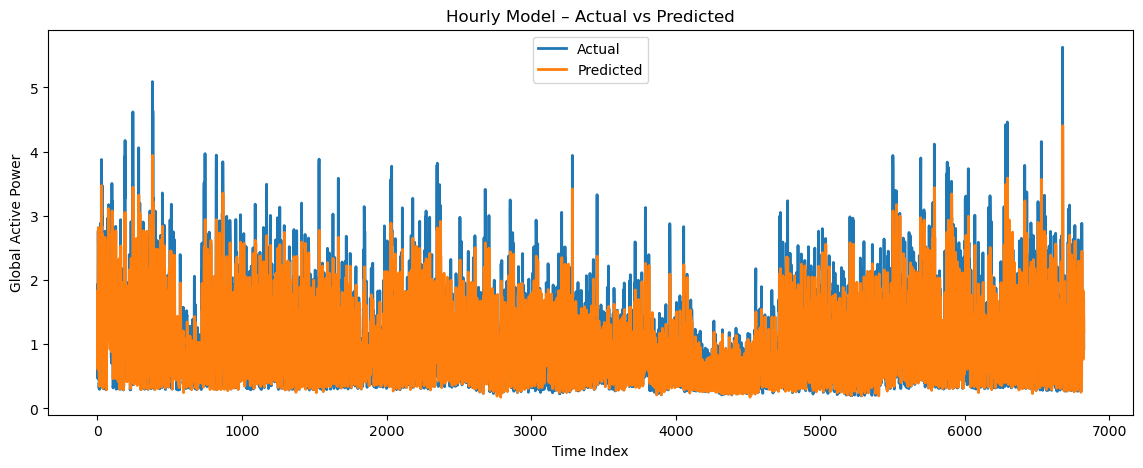

In [160]:
#hourly predicted vs actual
plt.figure(figsize=(14,5))
plt.plot(y_test_h, label='Actual', linewidth=2)
plt.plot(y_pred_test_h, label='Predicted', linewidth=2)
plt.title('Hourly Model – Actual vs Predicted')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

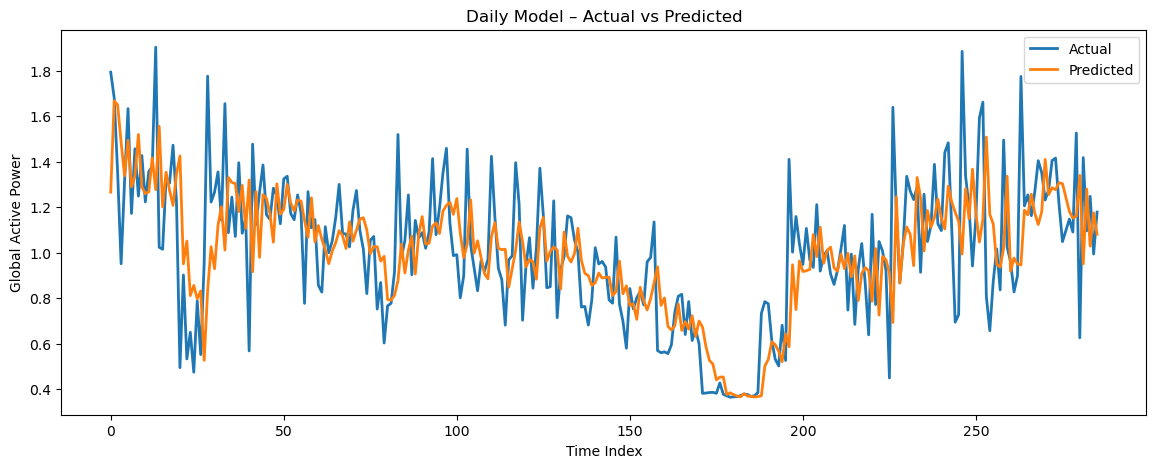

In [162]:
#daily predicted vs actual
plt.figure(figsize=(14,5))
plt.plot(y_test_d, label='Actual', linewidth=2)
plt.plot(y_pred_test_d, label='Predicted', linewidth=2)
plt.title('Daily Model – Actual vs Predicted')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()